## <font color=darkblue> NETWORK WITH THREE HIDDEN LAYERS

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
import vnns

<font color=darkblue> Compared to earlier notebook, we just set num_hidden_layers = 3 and total_units_max = 30 (again sticking to the arbitrary rule of having maximum 10 units per layer.)



*** Data: elliptic1 ***


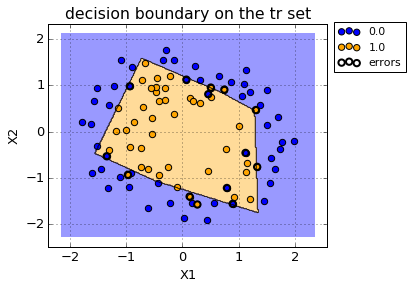

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,elliptic1,True,GD,3745,4.822598,1,"[4, 4, 4]",1.0,0.853,0.696




*** Data: elliptic2 ***


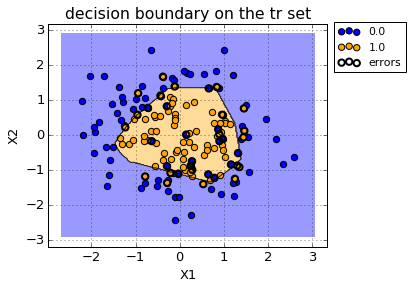

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,elliptic2,True,GD,196,0.214383,1,"[6, 6, 6]",1.0,0.776,0.846




*** Data: complex2 ***


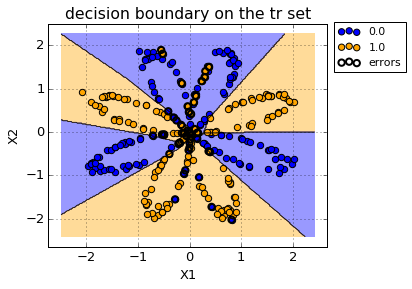

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,complex2,True,GD,873,1.378508,1,"[6, 6, 6]",3.0,0.857,0.772




*** Data: complex3 ***


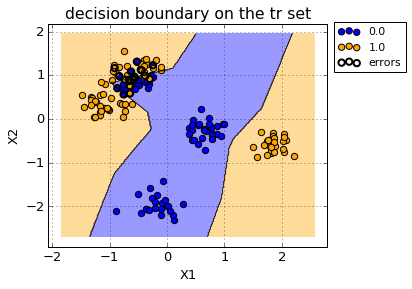

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,complex3,True,GD,2195,2.684745,1,"[5, 5, 5]",0.1,0.882,0.897


In [3]:
for data in ['elliptic1','elliptic2','complex2','complex3']:
    print("\n\n*** Data:", data, "***")
    dla = vnns.DeepLearnAuto(datafile = "Data\\Medium\\"+data+"_tr.csv", 
                             normalize = True, 
                             polydeg = 1,
                             method = 'GD',                             
                             initialize = 'deep',
                             learning_rate= 'auto', 
                             lamda = 'auto',
                             maxiter = 10000, 
                             hidden_units = 'auto',
                             num_hidden_layers = 3, 
                             total_units_max = 30, 
                             plot_output = True)
    summary = dla.generate_summary()
    display(summary)

<font color=darkblue> Although none of these models meets our success criterion of training score + test score >= 1.8, complex3 gets actually very close (1.779), presenting a visible improvement vs. earlier attempts using one or two hidden layers. Below, we turn on plotting/reporting methods for this dataset to provide further information on how the hyperparameters were auto-claculated and specific training and test scores were found out. On the remaining three datasets, networks with three hidden layers do not show improvement vs. earlier scores obtained with one (for elliptic2) or two hidden layers (for elliptic1 and complex2) although the current solutions look all visually acceptable. 

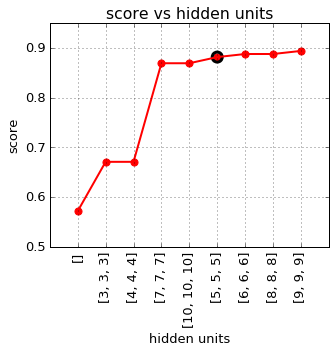

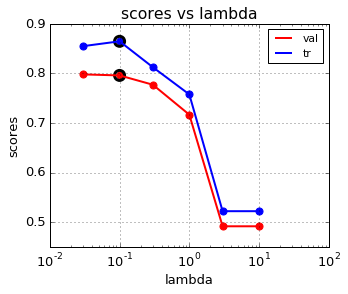

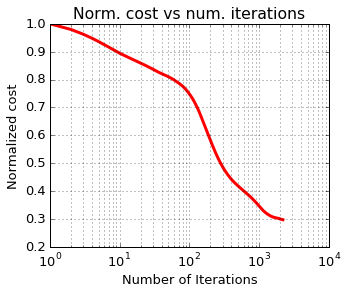


data:
	file: Data\Medium\complex3_tr.csv
	m = 161 training examples
	n = 2 features
	original classes: [0.0, 1.0]
	number of samples in class 0 = 77
	number of samples in class 1 = 84
solver:
	feature normalization: yes
	polynomial regression: no
	neural network config: [2, 5, 5, 5, 1]
	regularization: yes (lambda = 0.1)
	method: GD
	learning rate = 0.081
output:
	* Converged
	initial cost = 0.360153054213
	final cost = 0.107210723973
	number of iterations = 2195
	accuracy on the training set: 0.882
	execution time:  2.521317  sec


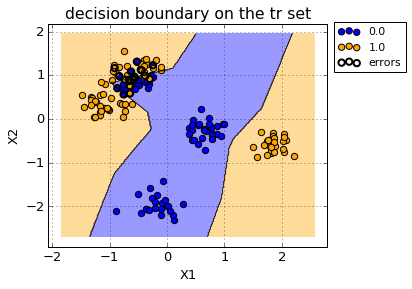

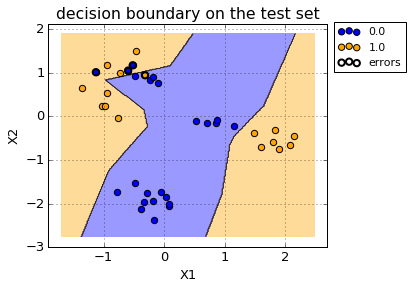

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,complex3,True,GD,2195,2.521317,1,"[5, 5, 5]",0.1,0.882,0.897


In [4]:
dla = vnns.DeepLearnAuto(datafile = "Data\\Medium\\complex3_tr.csv", 
                         normalize = True,
                         polydeg = 1,
                         method = 'GD',                             
                         initialize = 'deep',
                         learning_rate= 'auto', 
                         lamda = 'auto',
                         maxiter = 10000, 
                         hidden_units = 'auto',
                         num_hidden_layers = 3, 
                         total_units_max = 30, 
                         plot_J = True, 
                         report_summary = True, 
                         plot_output = True,
                         plot_test = True,
                         plot_hidden = True,
                         plot_lam = True)
summary = dla.generate_summary()
display(summary)

<font color=darkblue> Now, instead of attempting to improve the scores on the remaining three datasets by trying networks with even more hidden layers, in the next notebook we will look into a somewhat different approach where we will combine neural networks with polynomial regression to see whether this would allow any improvement over what we have achieved so far with polydeg = 1 on the last four datasets.